Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



Missing Values Check:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


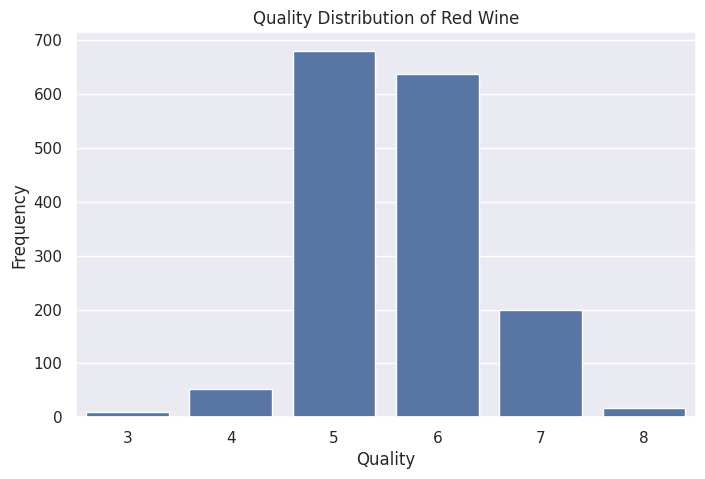

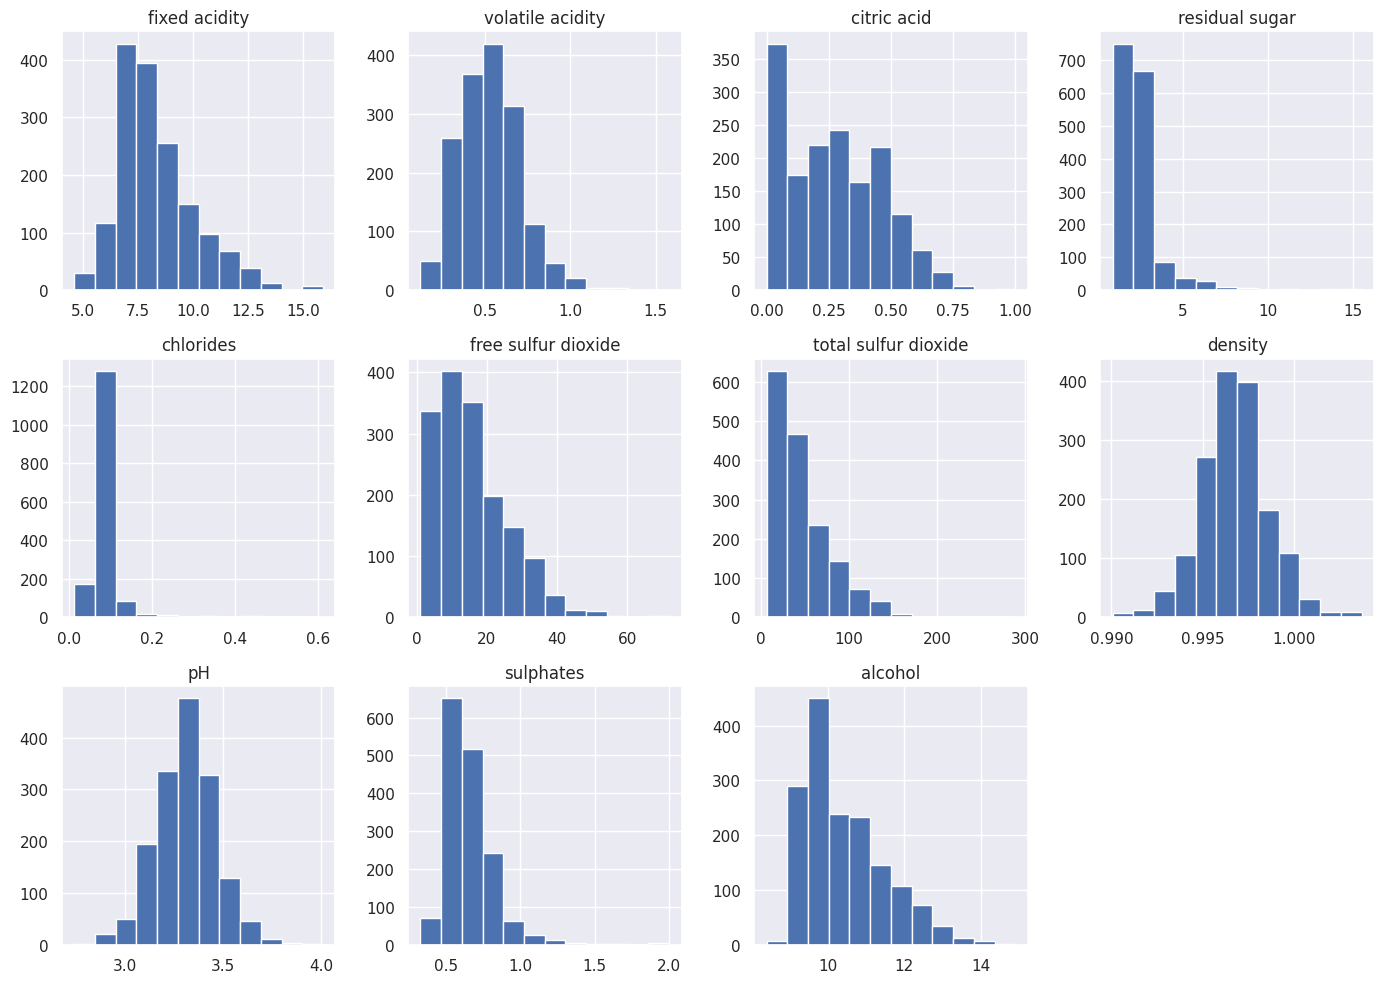

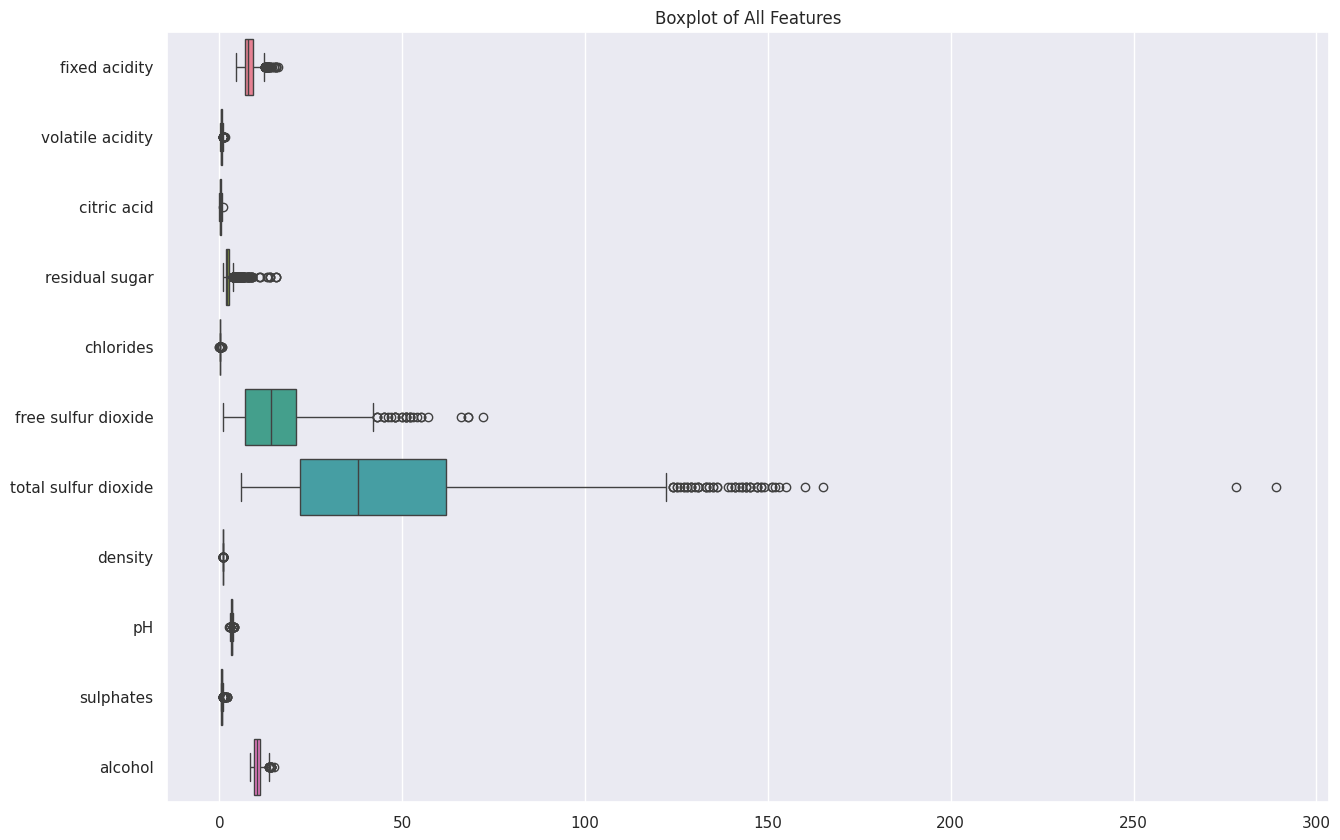

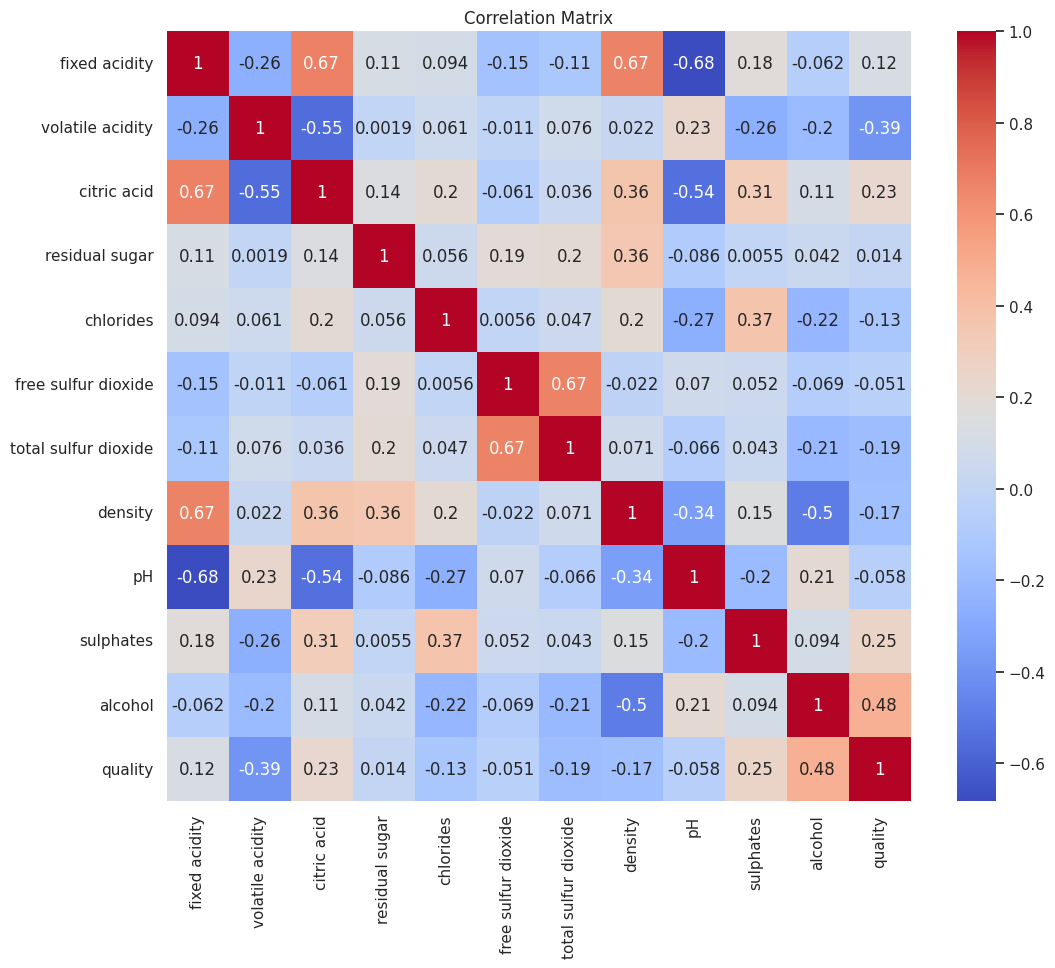


Multiple Linear Regression Metrics:
Mean Absolute Error (MAE): 0.5163
Mean Squared Error (MSE): 0.4242
Root Mean Squared Error (RMSE): 0.6513
Accuracy (MLR): 0.5814
Precision (MLR): [0.         0.         0.66382979 0.52238806 0.45833333 0.        ]


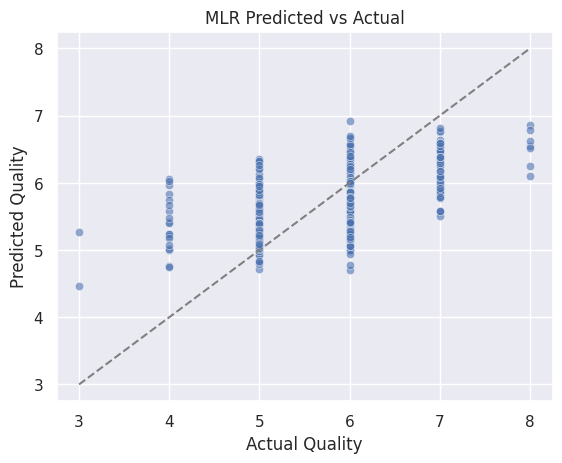


Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (3,), 'solver': 'lbfgs'}

Neural Network Metrics:
Mean Absolute Error (MAE): 0.4954
Mean Squared Error (MSE): 0.4017
Root Mean Squared Error (RMSE): 0.6338
Accuracy (Neural Network): 0.5890
Precision (Neural Network): [0.         0.33333333 0.66956522 0.5372549  0.475      0.        ]


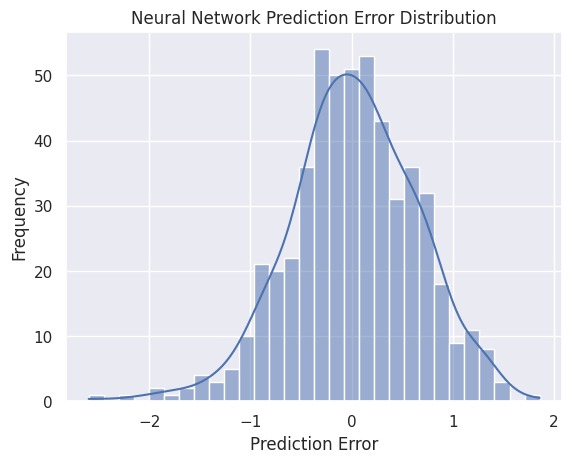

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('/content/winequality-red.csv')

# Data exploration
print("Dataset Overview")
display(df.info())
display(df.head())
display(df.describe())

print("\nMissing Values Check:")
print(df.isnull().sum())

# Quality distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df)
plt.title('Quality Distribution of Red Wine')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

# Feature distributions
features = df.columns[:-1]
df[features].hist(bins=12, figsize=(14, 10), layout=(3, 4))
plt.tight_layout()
plt.show()

# Boxplot visualization for detecting outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[features], orient="h")
plt.title('Boxplot of All Features')
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Train-Test Split
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multiple Linear Regression (MLR)
mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train)
y_pred_mlr = mlr.predict(X_test_scaled)

# Regression metrics for MLR
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)

print("\nMultiple Linear Regression Metrics:")
print(f"Mean Absolute Error (MAE): {mae_mlr:.4f}")
print(f"Mean Squared Error (MSE): {mse_mlr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_mlr:.4f}")

# Classification based on regression predictions
def classify(y_pred, y_actual, tol):
    return [actual if abs(pred - actual) <= tol else round(pred) for actual, pred in zip(y_actual, y_pred)]

TOLERANCE = 0.25
class_pred_mlr = classify(y_pred_mlr, y_test, TOLERANCE)

# Accuracy and precision
print(f"Accuracy (MLR): {accuracy_score(y_test, class_pred_mlr):.4f}")
print(f"Precision (MLR): {precision_score(y_test, class_pred_mlr, average=None, zero_division=0)}")

plt.figure()
sns.scatterplot(x=y_test, y=y_pred_mlr, alpha=0.6)
plt.plot([3,8], [3,8], '--', color='gray')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("MLR Predicted vs Actual")
plt.show()

# Neural Network Regression
mlp = MLPRegressor(max_iter=1000)
param_grid = {
    'hidden_layer_sizes': [(i,) for i in range(1, 11)],
    'alpha': [0.0001, 0.001, 0.01],
    'activation': ['logistic', 'relu'],
    'solver': ['lbfgs', 'adam']
}

grid = GridSearchCV(mlp, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid.fit(X_train_scaled, y_train)

print(f"\nBest Parameters: {grid.best_params_}")

# Evaluate best estimator
y_pred_mlp = grid.best_estimator_.predict(X_test_scaled)

# Metrics for Neural Network
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)

print("\nNeural Network Metrics:")
print(f"Mean Absolute Error (MAE): {mae_mlp:.4f}")
print(f"Mean Squared Error (MSE): {mse_mlp:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_mlp:.4f}")

class_pred_mlp = classify(y_pred_mlp, y_test, TOLERANCE)

# Accuracy and precision for Neural Network
print(f"Accuracy (Neural Network): {accuracy_score(y_test, class_pred_mlp):.4f}")
print(f"Precision (Neural Network): {precision_score(y_test, class_pred_mlp, average=None, zero_division=0)}")

# Error distribution plot
errors_mlp = y_test - y_pred_mlp
plt.figure()
sns.histplot(errors_mlp, bins=30, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Neural Network Prediction Error Distribution')
plt.show()



Best Parameters (KNN): {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

K-Nearest Neighbors (KNN) Metrics:
Mean Absolute Error (MAE): 0.4347
Mean Squared Error (MSE): 0.3742
Root Mean Squared Error (RMSE): 0.6118
Accuracy (KNN): 0.6515
Precision (KNN): [0.         0.         0.75       0.59398496 0.56140351 1.        ]


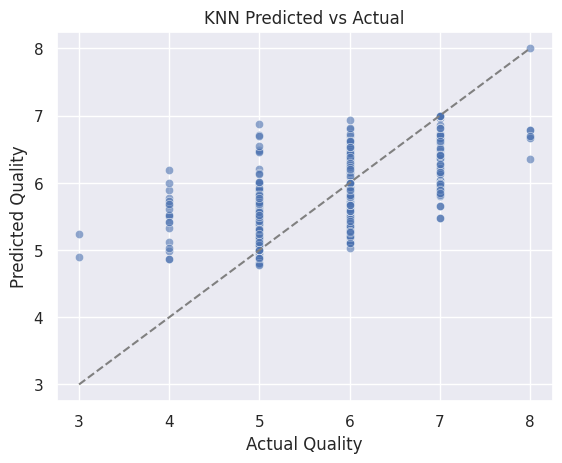

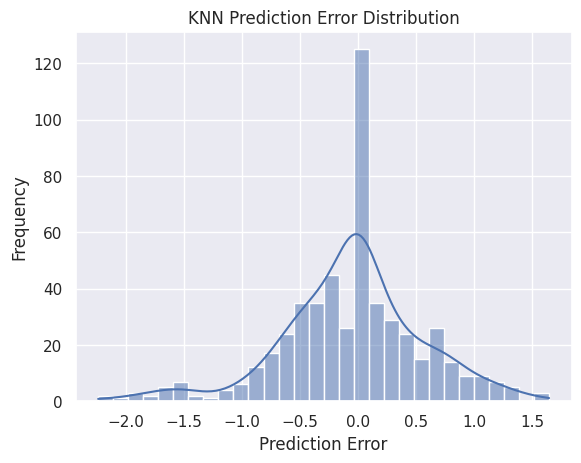


Best Parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Random Forest Metrics:
Mean Absolute Error (MAE): 0.4489
Mean Squared Error (MSE): 0.3616
Root Mean Squared Error (RMSE): 0.6013
Accuracy (Random Forest): 0.6477
Precision (Random Forest): [0.         0.         0.72727273 0.60416667 0.52727273 0.        ]


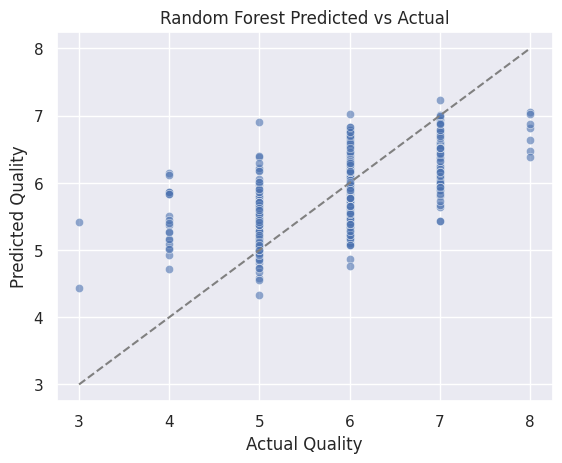

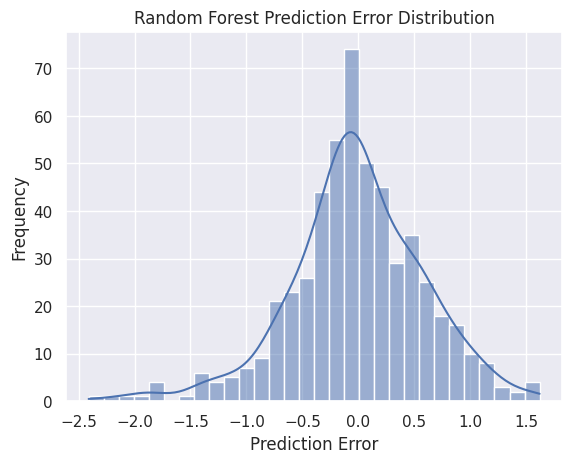

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# KNN Regression with GridSearchCV
knn = KNeighborsRegressor()
param_grid_knn = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(knn, param_grid_knn, scoring='neg_mean_absolute_error', cv=5)
grid_knn.fit(X_train_scaled, y_train)

print(f"\nBest Parameters (KNN): {grid_knn.best_params_}")

# Evaluate best estimator
y_pred_knn = grid_knn.best_estimator_.predict(X_test_scaled)

# Metrics for KNN
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print("\nK-Nearest Neighbors (KNN) Metrics:")
print(f"Mean Absolute Error (MAE): {mae_knn:.4f}")
print(f"Mean Squared Error (MSE): {mse_knn:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.4f}")

# Classification based on regression predictions
class_pred_knn = classify(y_pred_knn, y_test, TOLERANCE)

# Accuracy and precision for KNN
print(f"Accuracy (KNN): {accuracy_score(y_test, class_pred_knn):.4f}")
print(f"Precision (KNN): {precision_score(y_test, class_pred_knn, average=None, zero_division=0)}")

# Scatter plot for KNN predicted vs actual
plt.figure()
sns.scatterplot(x=y_test, y=y_pred_knn, alpha=0.6)
plt.plot([3, 8], [3, 8], '--', color='gray')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("KNN Predicted vs Actual")
plt.show()

# Error distribution plot for KNN
errors_knn = y_test - y_pred_knn
plt.figure()
sns.histplot(errors_knn, bins=30, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('KNN Prediction Error Distribution')
plt.show()

# Random Forest Regression
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(rf, param_grid_rf, scoring='neg_mean_absolute_error', cv=5)
grid_rf.fit(X_train_scaled, y_train)

print(f"\nBest Parameters (Random Forest): {grid_rf.best_params_}")

# Evaluate best estimator
y_pred_rf = grid_rf.best_estimator_.predict(X_test_scaled)

# Metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("\nRandom Forest Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")

# Classification based on regression predictions
class_pred_rf = classify(y_pred_rf, y_test, TOLERANCE)

# Accuracy and precision for Random Forest
print(f"Accuracy (Random Forest): {accuracy_score(y_test, class_pred_rf):.4f}")
print(f"Precision (Random Forest): {precision_score(y_test, class_pred_rf, average=None, zero_division=0)}")

# Scatter plot for Random Forest predicted vs actual
plt.figure()
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([3, 8], [3, 8], '--', color='gray')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Random Forest Predicted vs Actual")
plt.show()

# Error distribution plot for Random Forest
errors_rf = y_test - y_pred_rf
plt.figure()
sns.histplot(errors_rf, bins=30, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Random Forest Prediction Error Distribution')
plt.show()